In [1]:
# Имопртируем нужные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Salary_Data.csv") #Читаем данные .csv файла

In [3]:
df.info() #выводим информацию о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [4]:
df.head(5)  #первые 5 даннных

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [5]:
df.describe() # Описание трех полей их количество, среднее значение, Стандартное отклонение, минимальное значение, промежутки и максимальное значение 

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [6]:
df.isnull().sum() # Ищем количество пустых полей

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [7]:
df = df.dropna(how='any') #удаляем ненужные строки с пустыми полями

In [8]:
df.isnull().sum() #убедимся что поля очищены

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

**Форматирование строк для единтичности будущих вычислении**


In [9]:
df["Education Level"] = df["Education Level"].str.lower()
df["Education Level"] = df["Education Level"].str.replace(" degree", "")
df["Job Title"] = df["Job Title"].str.lower()

Выводим гистограмму, показывающую распределение зарплат.

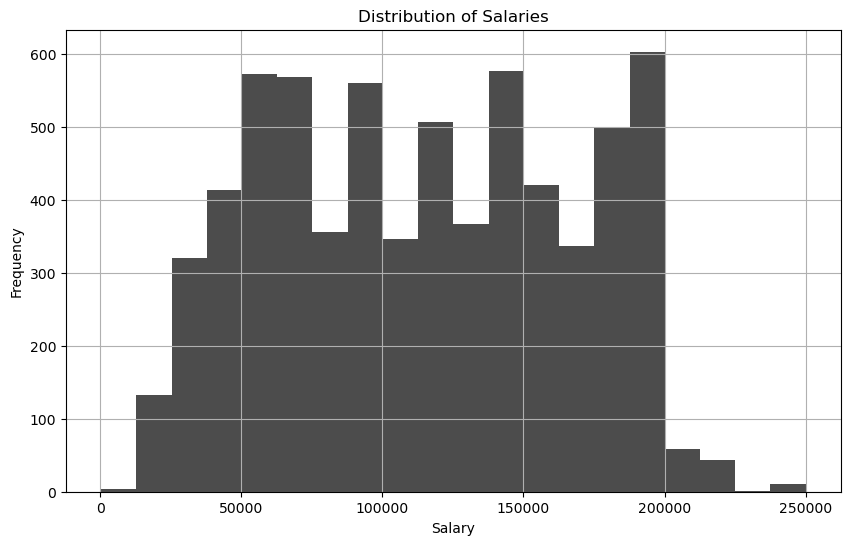

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(df["Salary"], bins=20, color='black', alpha=0.7)
plt.title('Distribution of Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()


1.Каково распределение зарплат в наборе данных и каковы основные сводные статистические данные?

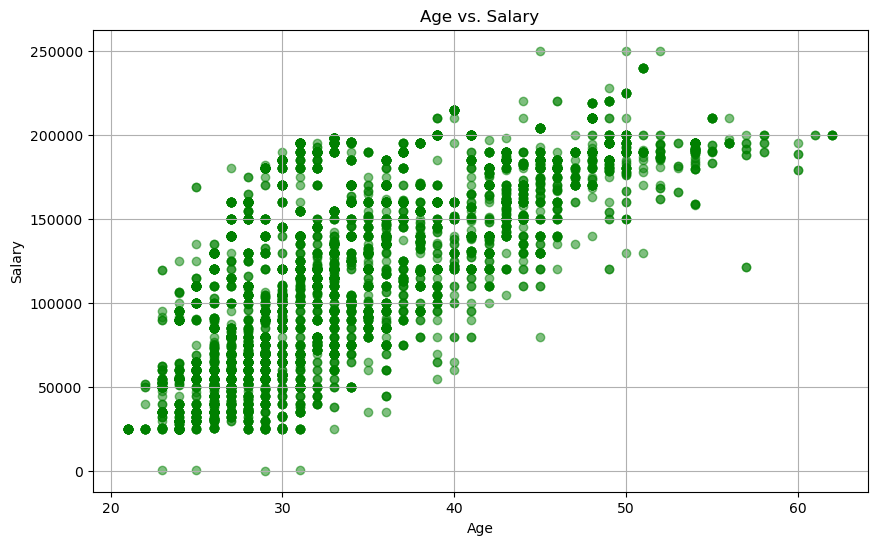

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Age"], df["Salary"], c='green', alpha=0.5)
plt.title('Age vs. Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)

2.Как возраст коррелирует с зарплатой? Получают ли пожилые люди, как правило, большую компенсацию?

In [12]:
df["Age"].corr(df["Salary"])

0.7280606296367428

In [13]:
3.Имеют ли люди с более многолетним опытом работы тенденцию получать более высокую заработную плату, и если да, то какова природа этой взаимосвязи?

Object `взаимосвязи` not found.


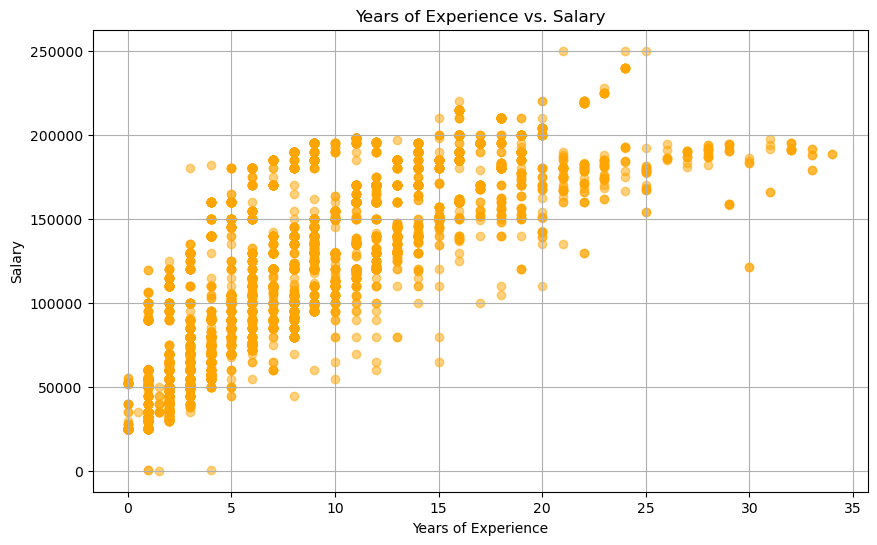

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Years of Experience"], df["Salary"], c='orange', alpha=0.5)
plt.title('Years of Experience vs. Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)

In [15]:
df["Years of Experience"].corr(df["Salary"])

0.8089681695139435

Если корриляция больше нуля, то люди с более многолетним опытом работы тенденцию получают чаще.

In [16]:
4.Оказывает ли уровень образования существенное влияние на заработную плату, и если да, то какие степени дают самую высокую компенсацию?

Object `компенсацию` not found.


In [17]:
education_salary = df.groupby("Education Level")["Salary"].mean().sort_values(ascending=False)
education_salary

Education Level
phd            165651.457999
master's       130112.056452
bachelor's      95082.908640
high school     36706.694196
Name: Salary, dtype: float64

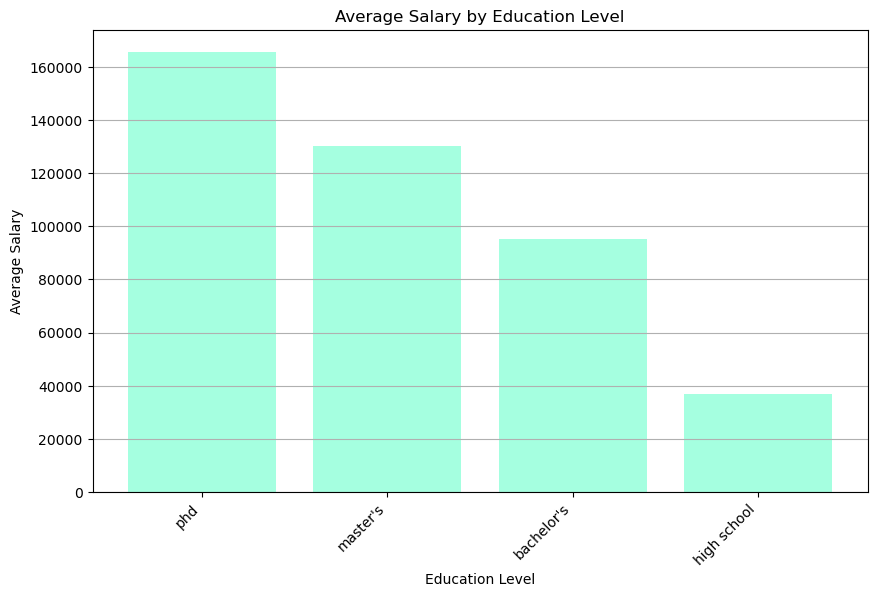

In [18]:
plt.figure(figsize=(10, 6))
plt.bar(education_salary.index, education_salary.values, color='aquamarine', alpha=0.7)
plt.title('Average Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y")

Можно убидиться что да. В странах запада твое образование имеет значение на твою зарплату. В среднем phd получают 160к долларов в год в отличии от выпускника бакалавра, который получает 90к в среднем в году.

In [19]:
5.Можем ли мы выявить какие-либо тенденции в заработной плате, основанные на различных названиях должностей? Какие роли, как правило, предлагают более высокую компенсацию?

Object `компенсацию` not found.


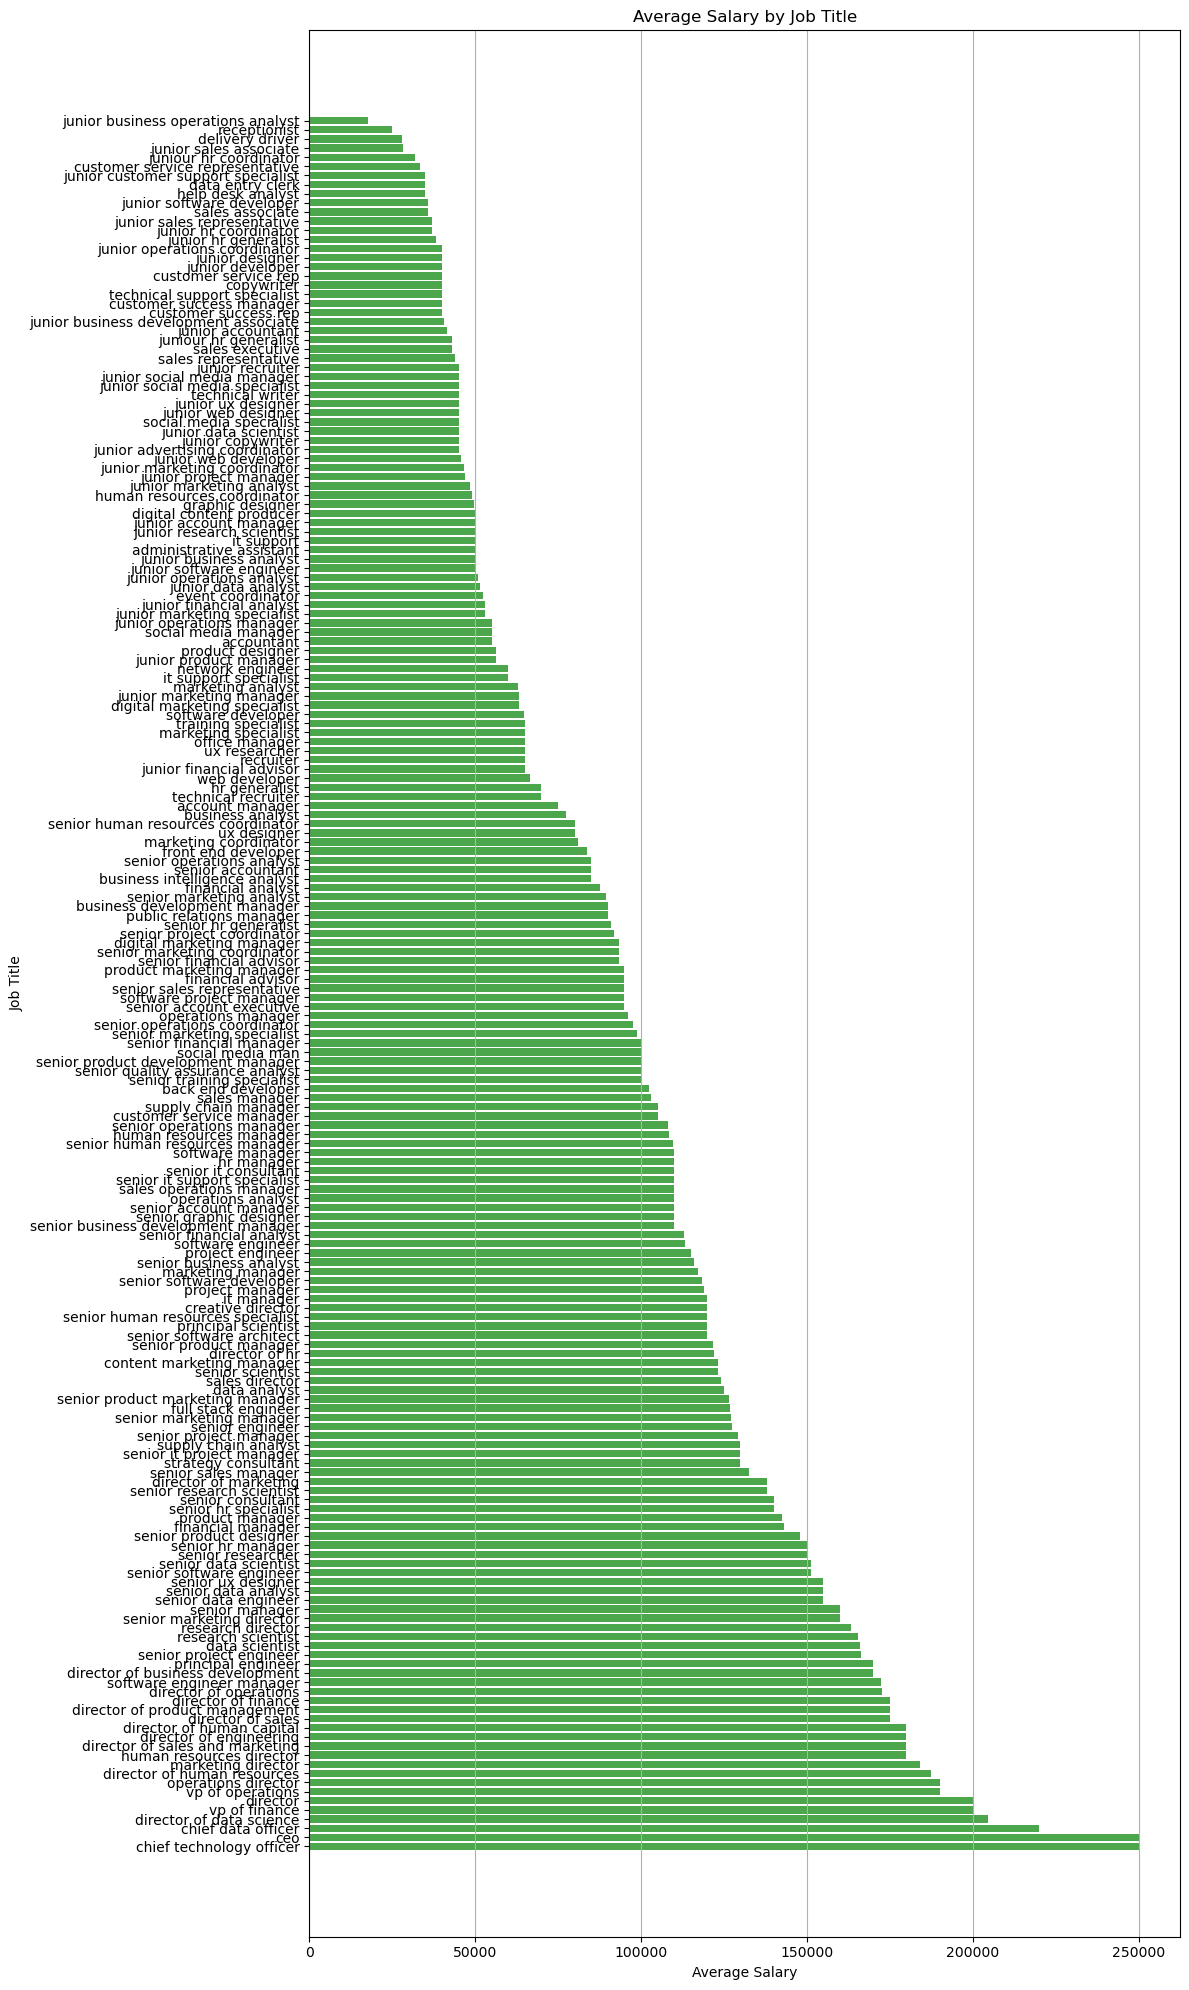

In [20]:
job_salary = df.groupby("Job Title")["Salary"].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 20))
plt.barh(job_salary.index, job_salary.values, color='green', alpha=0.7)
plt.title('Average Salary by Job Title')
plt.xlabel('Average Salary')
plt.ylabel('Job Title')
plt.grid(axis="x")

plt.tight_layout()
plt.show()

На гистограмме видно что у должностой повыше соответсвенно выше зарплата в среднем. Senior и Director зачастую занимают топовые позиции в зарплате.

Дополнение: В качестве примера можно сравнить полами

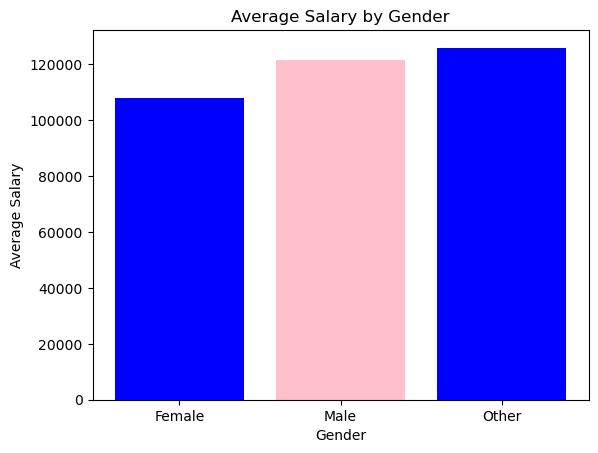

In [21]:
average_salaries = df.groupby("Gender")["Salary"].mean()

plt.bar(average_salaries.index, average_salaries.values, color=['blue', 'pink'])
plt.title('Average Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.show()

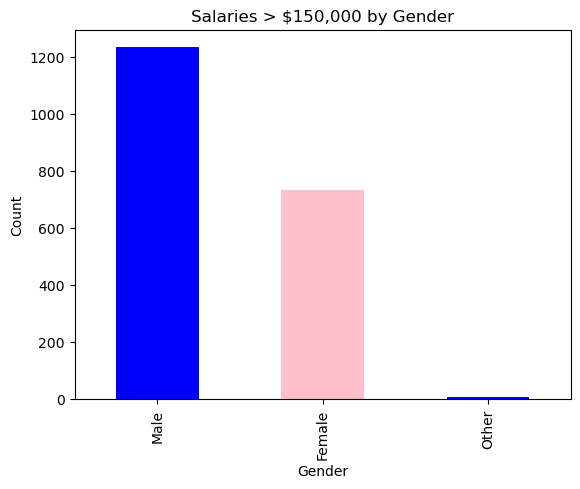

In [22]:
df = df[df['Salary'] > 150000]

salary_counts = df['Gender'].value_counts()

salary_counts.plot(kind="bar", color=['blue', 'pink'])
plt.title('Salaries > $150,000 by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

Как можно заметить. Зарплата свыше 150 000$ мужчин больше почти в два раза чем у женщин. 